In [1]:
# Importing the important libraries and functions from the libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [2]:
# Connecting to the csv file and printing the first 5 rows from the file:

app1=pd.read_csv("C:\\Users\\pooja\\Downloads\\Python project\\googleplaystore.csv")
app1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Checking the datatypes of the column:

print(app1.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [4]:
# Checking if there is any null value: Oh!! There are many..

print(app1.isnull().sum())
app1.shape

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


(10841, 13)

In [5]:
# Dropping the null values:

app1.dropna(inplace=True)
print(app1.shape)

(9360, 13)


In [6]:
#Cleaning the data given:
#Counting the values in the Size column:

print(app1.Size.value_counts())

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
411k                     1
525k                     1
730k                     1
241k                     1
696k                     1
Name: Size, Length: 413, dtype: int64


In [7]:
#Defining function to remove the 'M' and 'k' from the Size column:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x

    else: return None

In [8]:
#Checking if the M and k has been dropped:

app1.Size=app1.Size.map(change)
app1.Size.value_counts()


14000.0    165
12000.0    161
11000.0    159
15000.0    159
13000.0    157
          ... 
241.0        1
837.0        1
930.0        1
812.0        1
143.0        1
Name: Size, Length: 411, dtype: int64

In [9]:
print(app1.Size.isnull().sum())
app1.Size.fillna(method='pad',inplace=True)
print(app1.Size.isnull().sum())

1637
0


In [10]:
#Changing the datatype of Reviews column:

app1.Reviews=app1.Reviews.astype('float')

In [11]:
#Removing '+' and ',' from the Installs column:

print(app1.Installs.value_counts()[:5])
app1.Installs=app1.Installs.map(lambda x:x.replace(',','').replace('+',''))
print(app1.Installs.value_counts()[:5])
app1.Installs=app1.Installs.astype('float')

1,000,000+     1576
10,000,000+    1252
100,000+       1150
10,000+        1009
5,000,000+      752
Name: Installs, dtype: int64
1000000     1576
10000000    1252
100000      1150
10000       1009
5000000      752
Name: Installs, dtype: int64


In [12]:
#Removing $ sign from the Price column:
print(app1.Price.value_counts()[:5])
app1.Price=app1.Price.map(lambda x:x.replace('$',''))
print(app1.Price.value_counts()[:5])
app1.Price=app1.Price.astype('float')

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64
0       8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64


In [13]:
#Checking the datatypes of the column:

print(app1.dtypes)

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [14]:
#Checking the length of the records which has ratings more than 5:

print(len(app1[app1.Rating>5]))

0


In [15]:
#Checking the length of the records which has reviews more than installs:

print(len(app1[app1.Reviews>app1.Installs]))

7


In [16]:
#Checking the length of the records which has type=free and price greater than 0:

print(len(app1[(app1.Type=='free')&(app1.Price>0)]))

0


In [17]:
#Creating a copy:

app1=app1[app1.Reviews<app1.Installs].copy()
print(app1.shape)

(9351, 13)


In [18]:
#Checking the price of the application which are more than 200 and copying it:

print(len(app1[app1.Price>200]))
app1=app1[app1.Price<200].copy()
print(app1.shape)

15
(9336, 13)


In [19]:
#Checking the Reviews of the application which are more than 2000000:

print(len(app1[app1.Reviews>=2000000]))
app1=app1[app1.Reviews<=2000000].copy()
print(app1.shape)

453
(8883, 13)


In [20]:
#Finding percentiles and deciding the threshold as cutoff for outlier:

print(app1.Installs.quantile([.25,.50,.75,.90,.99]))
print(len(app1[app1.Installs>= 10000000]))


0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
1627


In [21]:
#Checking Installs more than threshold:

app1=app1[app1.Installs<=10000000].copy()
print(app1.shape)

(8494, 13)


[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'Reviews'}>]
 [<AxesSubplot:title={'center':'Size'}>
  <AxesSubplot:title={'center':'Installs'}>]
 [<AxesSubplot:title={'center':'Price'}> <AxesSubplot:>]]


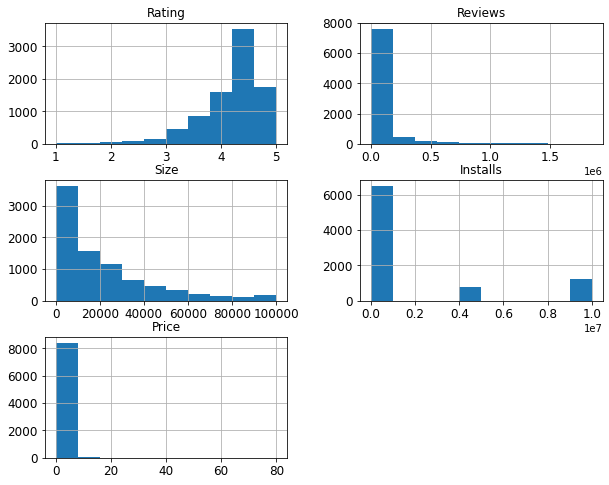

In [22]:
#Outlier Correction:
#making histogram for columns like rating,reviews,size,installs and price:

print(app1.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(10,8),xlabelsize=12,ylabelsize=12))

<AxesSubplot:>

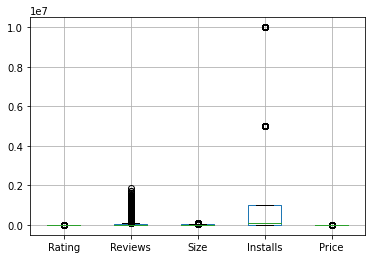

In [23]:
#Making boxplot for the above columns:

app1.boxplot(fontsize=10)

array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Installs'}>]], dtype=object)

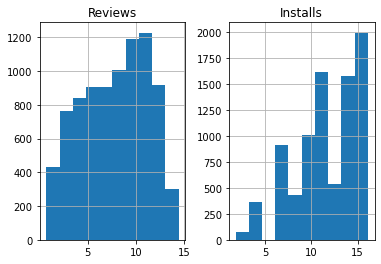

In [24]:
#Applying log for the Reviews and Installs to reduce the skew:

app1.Reviews=app1.Reviews.apply(func=np.log1p)
app1.Installs=app1.Installs.apply(func=np.log1p)

app1.hist(column=['Reviews','Installs'])

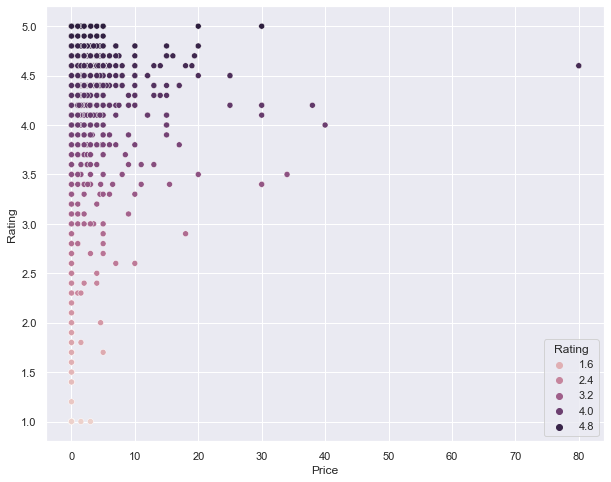

In [25]:
#Bivariate Analysis:
#Making Scatter plot to show the relation between Rating vs Price:
#The Pattern is not evenly distributed as we can see that the paid applications are having higher ratings, 
#although many of them are at low price 

plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1)
sns.scatterplot(app1.Price,app1.Rating,hue=app1.Rating)
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Rating'>

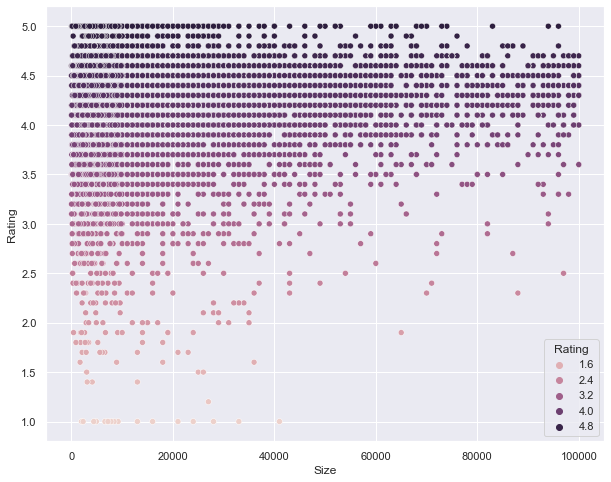

In [26]:
#Making Scatter plot to show the relation between Rating vs Size:
#The points are distributed evenly though it is no very clear pattern, 
#but it is looking like more heavy the app better the rating

plt.figure(figsize=(10,8))
sns.scatterplot(app1.Size,app1.Rating,hue=app1.Rating)

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

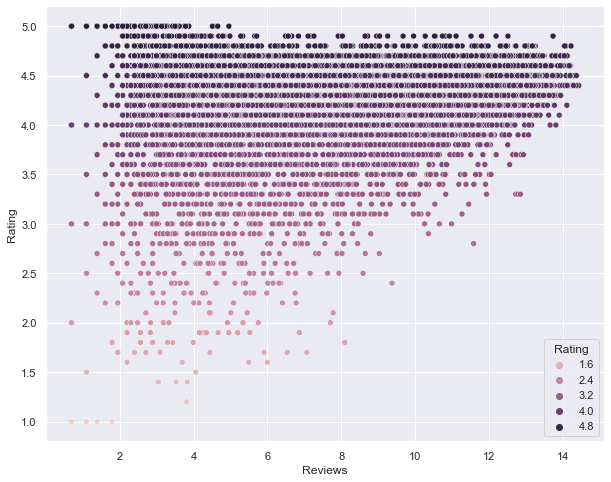

In [27]:
#Making Scatter plot to show the relation between Rating vs Reviews:
#Pattern is not very clear.Ratings are higher for the popular applications as they have more reviews.
#There are also few low rated apps among the popular ones.
#The apps with low ratings are reviewed by very less people because those apps are not popular and 
#after all after certain period of time ratings does not depend on popularity,It should depend on usefulness of the app.

plt.figure(figsize=(10,8))
sns.scatterplot(app1.Reviews,app1.Rating,hue=app1.Rating)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

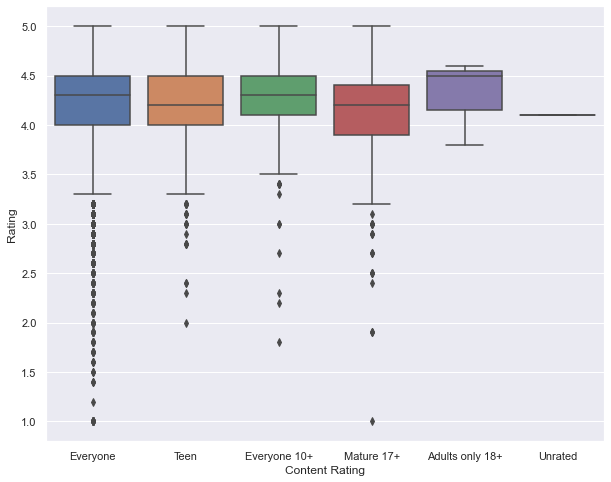

In [28]:
#Making Box plot to show the relation between Rating vs Content Rating:
#The Ratings for Content of 'Adults only 18+' is the highest.Ratings for rest all the other seems similar.

plt.figure(figsize=(10,8))
sns.boxplot(app1['Content Rating'],app1.Rating)

Text(0, 0.5, 'Rating')

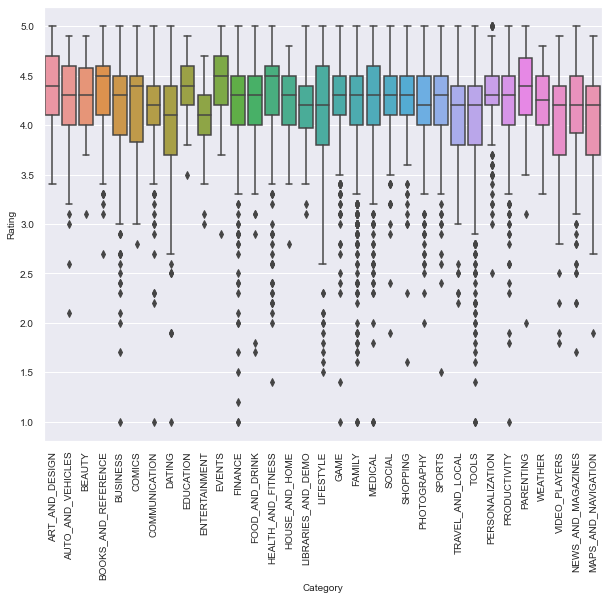

In [29]:
#Making Scatter plot to show the relation between Rating vs Category:
#Applications from the genre Books_and_reference,Events,Health_and_fitness have the highest median ratings.

plt.figure(figsize=(10,8))
sns.boxplot(app1.Category,app1.Rating)
plt.xticks(fontsize=10,rotation='vertical')
plt.yticks(fontsize=10)
plt.xlabel("Category",fontsize=10)
plt.ylabel("Rating",fontsize=10)

In [30]:
#Deleting irrelevant variables/data:

app1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
print(app1.shape)

(8494, 9)


In [31]:
#Creating dummies:

app1=pd.get_dummies(app1,drop_first=True)
print(app1.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)


In [32]:
#Applying Linear Regression algorithm to build a model:
x=app1.iloc[:,1:]
y=app1.iloc[:,:1]

In [33]:
x.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y.head()

,Rating
0,4.1
1,3.9
2,4.7
4,4.3
5,4.4


In [35]:
#we split 70% of the data to the training set while 30% of the data to test set using below code:

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
x_train.shape,x_test.shape

((5945, 156), (2549, 156))

In [36]:
#Building Model & Predicting the Ratings, 
#also checking the difference between the actual value and predicted value.

linreg=LinearRegression()
Model=linreg.fit(x_train, y_train)
predict=linreg.predict(x_test)

y_test=np.array(y_test)
predict=np.array(predict)

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()})
a.head(10)

,Actual,Predicted
0,4.0,3.881407
1,4.7,4.570785
2,4.2,4.014278
3,4.0,4.498359
4,4.4,4.005471
5,5.0,4.089561
6,5.0,4.316382
7,4.3,4.287191
8,4.3,4.060263
9,4.0,4.153254


In [37]:
# The Root Mean Squared Error represents the average difference between the observed known outcome values in the test data 
#and the predicted outcome seems to be 0.4905 which is good.
#R2 score of the model is:0.1378

print('R2_Score=',r2_score(y_test,predict))
print('Root Mean Squared Error=',np.sqrt(mean_squared_error(y_test,predict)))

R2_Score= 0.13780358816526062
Root Mean Squared Error= 0.4905012761716531
